# 3803ICT Big Data Analysis Assignment 

### Tyler Waugh and Long Nguyen

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data.csv')

# Check data types
df.dtypes

C:\Dev_Tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [3]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


#### Clean Data

In [4]:
# Check for missing values in columns and print results
print('Missing Values (Counts):\nTitle: ', df[df['Title'].isna()].shape[0],
      '\nCompany: ', df[df['Company'].isna()].shape[0],
      '\nDate: ', df[df['Date'].isna()].shape[0],
      '\nLocation: ', df[df['Location'].isna()].shape[0],
      '\nArea: ', df[df['Area'].isna()].shape[0],
      '\nClassification: ', df[df['Classification'].isna()].shape[0],
      '\nSubClassification: ', df[df['SubClassification'].isna()].shape[0],
      '\nRequirement: ', df[df['Requirement'].isna()].shape[0],
      '\nFullDescription: ', df[df['FullDescription'].isna()].shape[0],
      '\nLowestSalary: ', df[df['LowestSalary'].isna()].shape[0],
      '\nHighestSalary: ', df[df['HighestSalary'].isna()].shape[0],
      '\nJobType: ', df[df['JobType'].isna()].shape[0], sep='')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

# Show converted types
print('\n\nConverted Types:')
df.dtypes

Missing Values (Counts):
Title: 0
Company: 12004
Date: 0
Location: 121248
Area: 195819
Classification: 121248
SubClassification: 121248
Requirement: 7
FullDescription: 16175
LowestSalary: 0
HighestSalary: 0
JobType: 16098


Converted Types:


Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

#### Remove Unnecessary Rows / Columns

In [5]:
# Remove Id
df = df.drop('Id',axis=1)

In [6]:
df.head(30)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


In [7]:
df['Date'].describe()

count                  318477
unique                    163
top       2018-10-17 00:00:00
freq                    13059
first     2018-10-01 00:00:00
last      2019-03-13 00:00:00
Name: Date, dtype: object

## 1) Describe the dataset.
+ What are the categories/domains of the dataset?
+ What is the dataset size of each variation?
+ What is dataset structure/format?
+ What are attributes/features of review data you are going to use?
+ What are attributes/features of product data you are going to use?
+ Which parts of the dataset will you use or all of them? 

+ What are the categories/domains of the dataset?

The dataset provided for analysis is one comprised of various job postings obtained from the website Seek. Seek is one of the largest employment sites in Australia, and therefore is a good representation of the depth of the current job market.  The dataset contains 13 columns and 318477 rows, with types summarised in the following table.

| Columns   |  Data Types   |
|:-----------|:-------------:|
| Id | int64  |
| Title |String   |
| Company |String |
| Date | datetime|
| Location | String|
| Area | String|
| Classification | String|
| Sub Classification |String |
| Requirement |String |
| Full Description |String |
| Lowest Salary |int64 |
| Highest Salary | int64|
| JobType |String |

+ What is the dataset size of each variation?

| Columns   |  Data Types   |
|:-----------|:-------------:|
| Id | int64  |
| Title |String   |
| Company |String |
| Date | datetime|
| Location | String|
| Area | String|
| Classification | String|
| Sub Classification |String |
| Requirement |String |
| Full Description |String |
| Lowest Salary |int64 |
| Highest Salary | int64|
| JobType |String |

+ What is dataset structure/format? CSV????

+ What are attributes/features of review data you are going to use?
We think we're going to look at everything except for ID, and Full Description. Probably?

## 2) What steps were used for data preparation and preprocessing?
The data was imported using the pandas read_csv function for preprocessing and cleaning.  Most of the columns were already in an appropriate data format, with only the date of the job postings requiring conversion.
The ID column was removed as it doesn't have any meaningful purpose, being only the ID number for the job advertisement.

In [8]:
df['JobType'].unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

## 3) What is your hypothesis (expectation) about the analysis outcome? 

+ Average Salary per Location
+ Bigger city has higher average salary (looking at the variation of salaray within that city)
+ If there's more demand for a certain type of job classification, salary would be higher


# Part 2 – Data Analysis and Interpretation

In [9]:
# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Set sns style
sns.set()
sns.set_style("whitegrid")

## 1) Study the job metadata
### Market Sectors:
As can be seen below, the data is missing 38.1% of classifications and sub-classifications, so these job postings will be ignored.  This still leaves 

In [10]:
# Group jobs by classification
# Check how many jobs are missing a classification
rows = df.shape[0]
missing_class_percentage = (rows - df[df['Classification'].isna()].shape[0])/rows
missing_sub_percentage = (rows - df[df['SubClassification'].isna()].shape[0])/rows
print("Available classifications: ",missing_class_percentage*100,'%',sep='')
print("Available sub-classifications: ",missing_sub_percentage*100,'%',sep='')

Available classifications: 61.92880490584878%
Available sub-classifications: 61.92880490584878%


[Text(0, 0, 'Sydney'),
 Text(0, 0, 'Richmond & Hawkesbury'),
 Text(0, 0, 'Brisbane'),
 Text(0, 0, 'Gosford & Central Coast'),
 Text(0, 0, 'Adelaide'),
 Text(0, 0, 'Melbourne'),
 Text(0, 0, 'Perth'),
 Text(0, 0, 'Mackay & Coalfields'),
 Text(0, 0, 'Sunshine Coast'),
 Text(0, 0, 'Gold Coast'),
 Text(0, 0, 'West Gippsland & Latrobe Valley'),
 Text(0, 0, 'Hervey Bay & Fraser Coast'),
 Text(0, 0, 'South West Coast VIC'),
 Text(0, 0, 'Mornington Peninsula & Bass Coast'),
 Text(0, 0, 'Port Hedland, Karratha & Pilbara'),
 Text(0, 0, 'Ballarat & Central Highlands'),
 Text(0, 0, 'Bendigo, Goldfields & Macedon Ranges'),
 Text(0, 0, 'Yarra Valley & High Country'),
 Text(0, 0, 'Coffs Harbour & North Coast'),
 Text(0, 0, 'Newcastle, Maitland & Hunter'),
 Text(0, 0, 'Tumut, Snowy & Monaro'),
 Text(0, 0, 'Darwin'),
 Text(0, 0, 'Toowoomba & Darling Downs'),
 Text(0, 0, 'ACT'),
 Text(0, 0, 'Wollongong, Illawarra & South Coast'),
 Text(0, 0, 'Port Macquarie & Mid North Coast'),
 Text(0, 0, 'Southern High

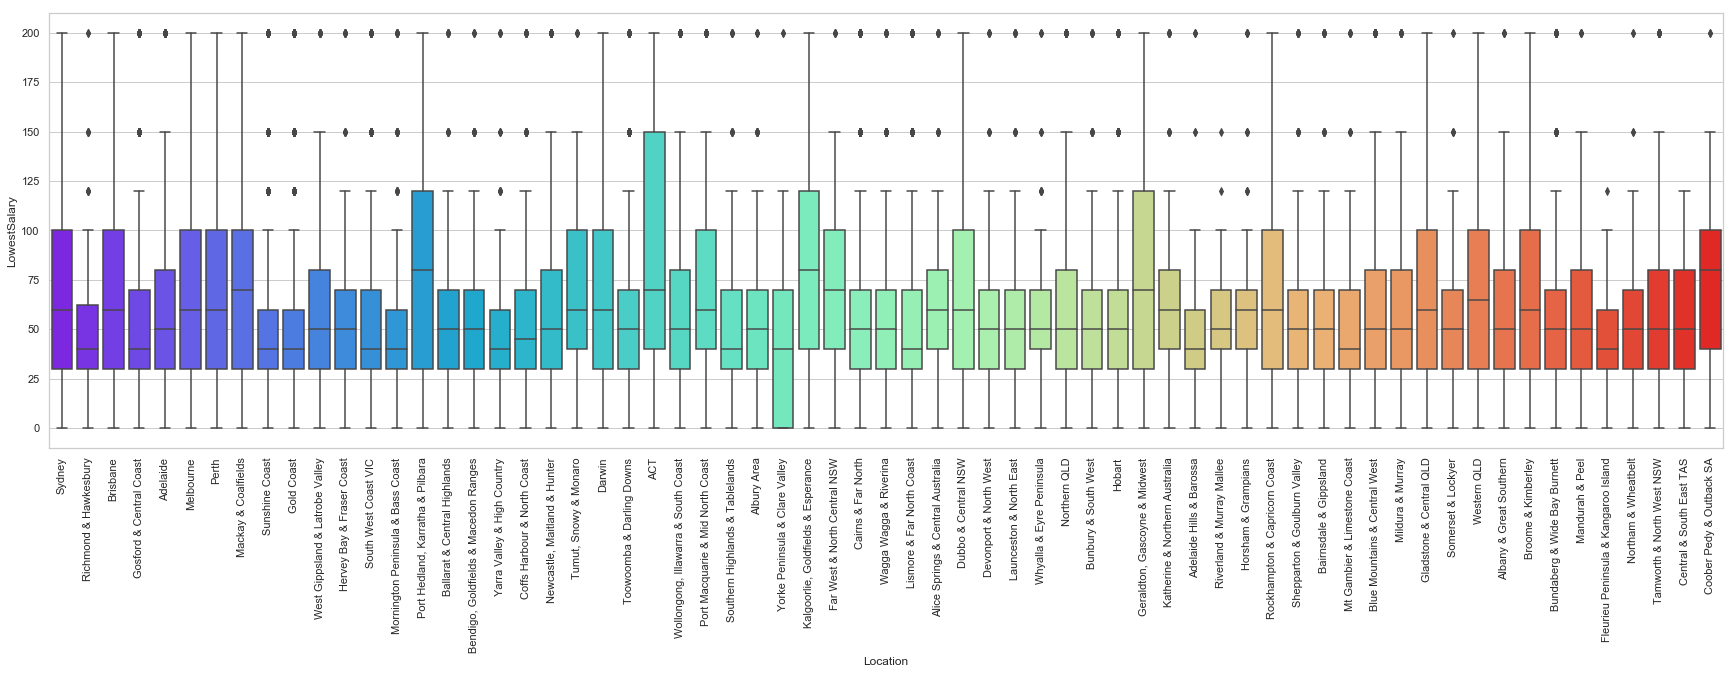

In [11]:
# Plot the distribution of lowest salaries by location
plt.figure(figsize=(30,8))

box_plt = sns.boxplot(x='Location',y='LowestSalary',data=df,palette='rainbow')
box_plt.set_xticklabels(box_plt.get_xticklabels(),rotation=90)

[Text(0, 0, 'Sydney'),
 Text(0, 0, 'Richmond & Hawkesbury'),
 Text(0, 0, 'Brisbane'),
 Text(0, 0, 'Gosford & Central Coast'),
 Text(0, 0, 'Adelaide'),
 Text(0, 0, 'Melbourne'),
 Text(0, 0, 'Perth'),
 Text(0, 0, 'Mackay & Coalfields'),
 Text(0, 0, 'Sunshine Coast'),
 Text(0, 0, 'Gold Coast'),
 Text(0, 0, 'West Gippsland & Latrobe Valley'),
 Text(0, 0, 'Hervey Bay & Fraser Coast'),
 Text(0, 0, 'South West Coast VIC'),
 Text(0, 0, 'Mornington Peninsula & Bass Coast'),
 Text(0, 0, 'Port Hedland, Karratha & Pilbara'),
 Text(0, 0, 'Ballarat & Central Highlands'),
 Text(0, 0, 'Bendigo, Goldfields & Macedon Ranges'),
 Text(0, 0, 'Yarra Valley & High Country'),
 Text(0, 0, 'Coffs Harbour & North Coast'),
 Text(0, 0, 'Newcastle, Maitland & Hunter'),
 Text(0, 0, 'Tumut, Snowy & Monaro'),
 Text(0, 0, 'Darwin'),
 Text(0, 0, 'Toowoomba & Darling Downs'),
 Text(0, 0, 'ACT'),
 Text(0, 0, 'Wollongong, Illawarra & South Coast'),
 Text(0, 0, 'Port Macquarie & Mid North Coast'),
 Text(0, 0, 'Southern High

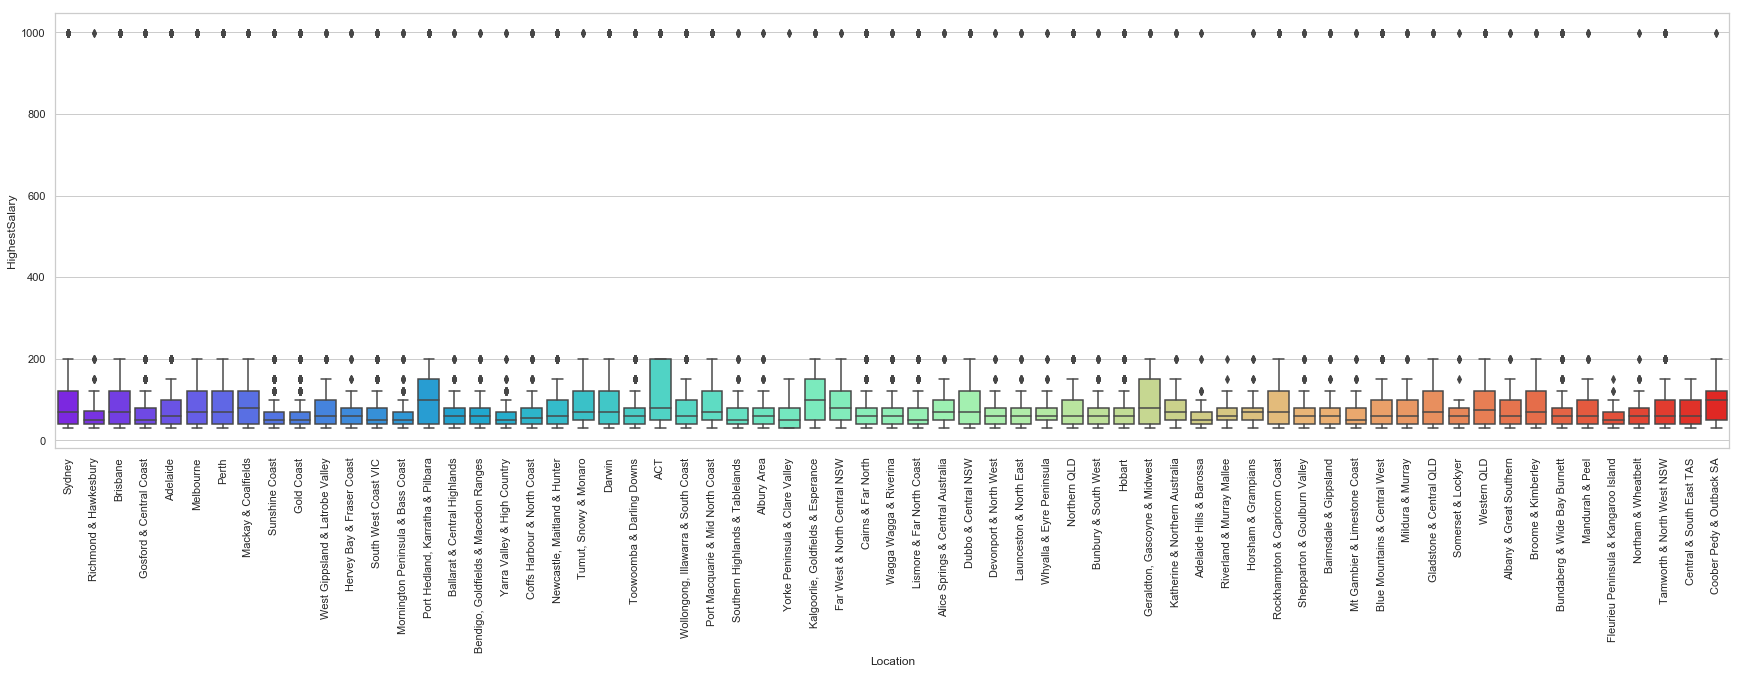

In [12]:
# Look at the distribution of highest salaries by location
plt.figure(figsize=(30,8))

box_plt = sns.boxplot(x='Location',y='HighestSalary',data=df,palette='rainbow')
box_plt.set_xticklabels(box_plt.get_xticklabels(),rotation=90)

In [13]:
# Find average lowest and highest salary per location
location_df = df.groupby(by='Location').mean().reset_index()
location_df.rename({"LowestSalary": "AverageLowest", "HighestSalary": "AverageHighest"},axis=1,inplace=True)

# Find the distribution of job postings by location
job_df = df["Location"].value_counts().reset_index()
job_df.rename({"index": "Location", "Location": "JobPostings"},axis=1,inplace=True)
location_df = pd.merge(location_df, job_df, on='Location')

location_df.head()

,Location,AverageLowest,AverageHighest,JobPostings
0,ACT,86.174400,198.718240,6250
1,Adelaide,57.991883,97.021494,6653
2,Adelaide Hills & Barossa,41.191710,68.948187,193
3,Albany & Great Southern,56.600000,101.233333,150
4,Albury Area,51.201923,75.543269,416


In [14]:
# Summary of job postings distribution
location_df["JobPostings"].describe()

count       65.000000
mean      3034.292308
std       9727.263546
min         57.000000
25%        250.000000
50%        576.000000
75%       1310.000000
max      60765.000000
Name: JobPostings, dtype: float64

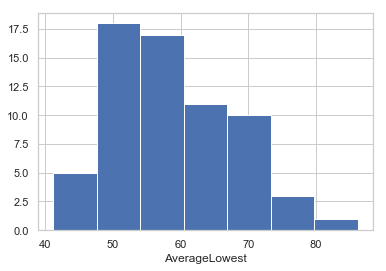

In [15]:
# Distribution of average lowest salaries Australia-wide
sns.distplot(location_df['AverageLowest'],kde=False,hist_kws=dict(alpha=1))

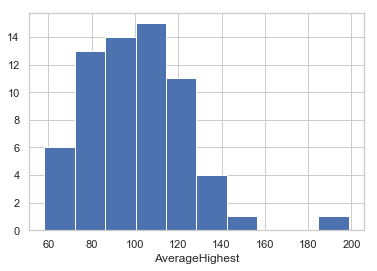

In [16]:
# Distribution of average highest salary Australia-wide
sns.distplot(location_df['AverageHighest'],kde=False,hist_kws=dict(alpha=1))

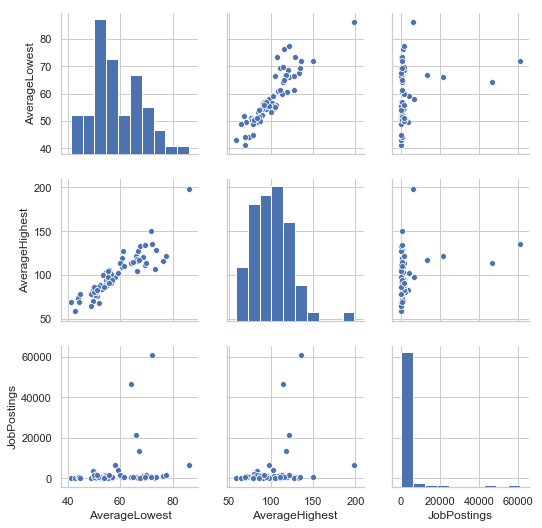

In [17]:
# Pairplot - Probably meaningless for job postings
# Can see the correlation between average lowest and average highest salary
sns.pairplot(location_df)

# In Progress (Messy)
### Can you detect which skills are needed?
Textual analysis of job requirements.  (Should be moved to its correct location at some stage).

In [147]:
import sklearn.feature_extraction.text as text_analysis
import nltk
import wordcloud

In [99]:
# Stopwords
stop_words = nltk.corpus.stopwords.words('english')

# Analyzer for use in CountVectorizer
stemming_analyzer = text_analysis.CountVectorizer().build_analyzer()
stemmer = nltk.stem.PorterStemmer()

# Stemmer function
def stem(words):
    return [stemmer.stem(word) for word in stemming_analyzer(words)]

In [65]:
# Check to see how many data points have requirement information
null_cnt = df[df['Requirement'].isna()].shape[0]
print(null_cnt)

7


In [78]:
# Prepare data for textual analysis
requirements_all = [data['Requirement'].strip() for index, data in df[df['Requirement'].isna()==False].iterrows()]
requirements_all[:5]

['Our Casual Stock Replenishers pride themselves on filling&#8232; shelves faster than anyone else in the industry.',
 'Our Casual Stock Replenishers pride themselves on filling &#8232;shelves faster than anyone else in the industry.',
 'BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA',
 'Bring it on - do you love the great outdoors and want to work with like minded people?  We are on the lookout for new team members to join our busines',
 'We are seeking highly articulate, enthusiastic and professional individuals who are looking to work night shift.....']

In [145]:
# Perform tf-idf on entire market
# Takes a while because of the custom stem analyzer
req_analysis = text_analysis.CountVectorizer(stop_words=stop_words,analyzer='word',max_features=200)
req_tf = req_analysis.fit_transform(requirements_all)

# Calculate tf-idf values
req_analysis_transformer = text_analysis.TfidfTransformer(use_idf=True)
req_tfidf = req_analysis_transformer.fit_transform(req_tf)

In [148]:
# Calculate the total for each word after normalization
totals = req_tfidf.sum(axis=0)

# Create list of common terms with their tf-idf sum in order from highest to lowest
freq = sorted([(word, totals[0, i]) for word, i in req_analysis.vocabulary_.items()], key=lambda x: x[1],reverse=True)
freq[:5]

[('team', 18406.70447932226),
 ('join', 17959.32319445331),
 ('opportunity', 14657.710076878182),
 ('seeking', 13904.949928360455),
 ('experienced', 13015.323093796223)]

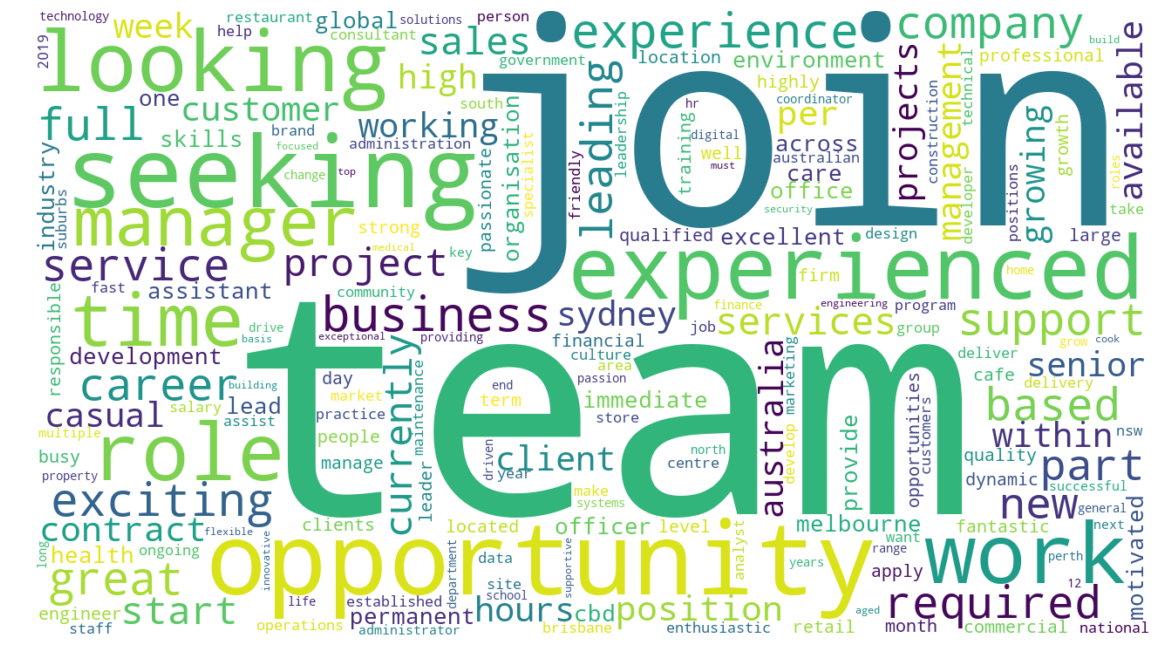

In [168]:
# Visualise
# Convert freq list to dict
freq_dict = {x: y for x,y in freq}

freq_dict.items()
word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
word_cloud.generate_from_frequencies(freq_dict)

plt.figure(figsize=(20,20))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Perform tf-idf on sectors